# Supervised Learning #
AI approaches: predicting if employee will report mental health interferes with work, predicting likelihood employee seeks treatment for mental health 

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import os



In [2]:
# Setting up where to save figures 
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Visualizations"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Gather the data, review of data structure ##

In [3]:
# Loading data, imported from CSV, cleaned by team member in alternate notebook- see: survey_data_cleaned_steve.ipynb
file_path = Path("../test_emily/survey_cleaned.csv/")
df_survey = pd.read_csv(file_path)
df_survey.head()

,Unnamed: 0,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,36-50
1,1,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,36-50
2,2,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,26-35
3,3,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,26-35
4,4,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,26-35


In [4]:
df_survey.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

Saving figure bar chart of Y1- not encoded


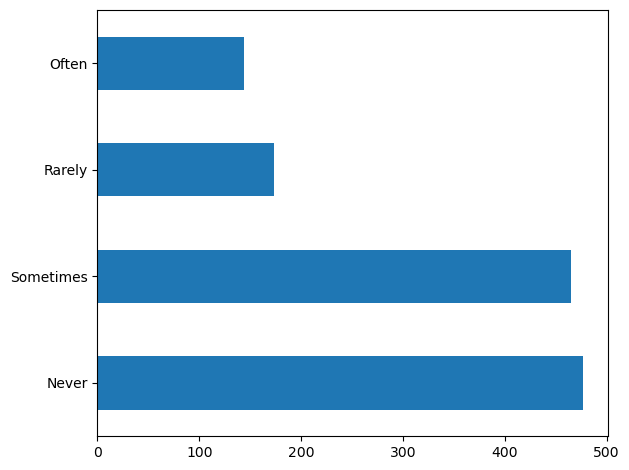

In [5]:
df_survey.work_interfere.value_counts().plot(kind='barh')
save_fig ("bar chart of Y1- not encoded")

In [6]:
df_survey.work_interfere.value_counts()

Never        477
Sometimes    465
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [7]:
df_survey.shape

(1259, 25)

In [8]:
#examine data frame structure, determine number of unique categories 
#planned outcome columns: treatment, work interference, observed consequences
df_survey.nunique().sort_values()

self_employed                   2
family_history                  2
treatment                       2
remote_work                     2
tech_company                    2
obs_consequence                 2
wellness_program                3
supervisor                      3
coworkers                       3
phys_health_consequence         3
mental_health_consequence       3
anonymity                       3
seek_help                       3
benefits                        3
mental_health_interview         3
mental_vs_physical              3
Gender                          3
care_options                    3
phys_health_interview           3
work_interfere                  4
leave                           5
no_employees                    6
age_range                       7
Country                        48
Unnamed: 0                   1259
dtype: int64

In [9]:
#eliminate unnecessary column
df_survey=df_survey.drop(columns=["Unnamed: 0"])

In [10]:
#view data frame
df_survey.head()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,36-50
1,Male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,36-50
2,Male,Canada,No,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,26-35
3,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,26-35
4,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,26-35


In [11]:
#general information about data frame to ensure
df_survey.describe()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
count,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,3,48,2,2,2,4,6,2,2,3,...,5,3,3,3,3,3,3,3,2,7
top,Male,United States,No,No,Yes,Never,6-25,No,Yes,Yes,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,26-35
freq,992,751,1113,767,637,477,290,883,1031,477,...,563,490,925,774,516,1008,557,576,1075,701


### Pre-processing: Encode categorical data into numeric values ###

In [12]:
# #ORIGINAL FEATURES
# #encode all strings into numeric values using OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(drop='first')
# column_codes=['Gender', 'Country', 'self_employed','family_history', 'treatment','no_employees',
#                              'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
#                              'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
#                              'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
#                              'mental_vs_physical', 'obs_consequence', 'age_range']

# transformed_values=enc.fit_transform(df_survey[column_codes]).toarray()
# #view the array
# print(transformed_values)

In [13]:
#encode all strings into numeric values using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
column_codes=['Gender', 'self_employed','family_history', 'treatment',
                             'remote_work', 'tech_company','care_options', 'wellness_program',
                             'seek_help', 'leave',
                             'coworkers', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'age_range']

transformed_values=enc.fit_transform(df_survey[column_codes]).toarray()
#view the array
print(transformed_values)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [14]:
#Instead of OneHot Encoder, we use Label Encoder to encode work_interfere (the outcome variable)
le= preprocessing.LabelEncoder()
df_survey["work_interfere"]=le.fit_transform(list(df_survey["work_interfere"]))
print(df_survey["work_interfere"])

df_survey["work_interfere"]=le.fit_transform(df_survey["work_interfere"])
print(df_survey["work_interfere"])


0       1
1       2
2       2
3       1
4       0
       ..
1254    0
1255    1
1256    3
1257    0
1258    3
Name: work_interfere, Length: 1259, dtype: int64
0       1
1       2
2       2
3       1
4       0
       ..
1254    0
1255    1
1256    3
1257    0
1258    3
Name: work_interfere, Length: 1259, dtype: int64


Saving figure bar chart of Y1-encoded


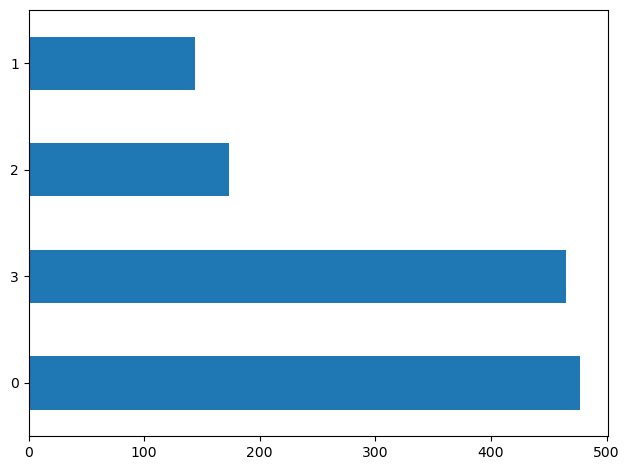

In [15]:
df_survey.work_interfere.value_counts().plot(kind='barh')
save_fig ("bar chart of Y1-encoded")

### After encoding is completed above, define X and y: where y is the target variable and X will be the model's features ###

In [16]:
#Define X and re-insert numerical arrays back into data frame to be used in model now they they have been transformed
X =pd.DataFrame(transformed_values, columns=enc.get_feature_names_out())

#Review the X variable data frame
X.head()



,Gender_Male,Gender_Other,self_employed_Yes,family_history_Yes,treatment_Yes,remote_work_Yes,tech_company_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,...,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,age_range_19-25,age_range_26-35,age_range_36-50,age_range_51-65,age_range_65+,age_range_Other
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
#Previously 24 features, became 94 
X.shape

(1259, 31)

In [18]:
X.columns

Index(['Gender_Male', 'Gender_Other', 'self_employed_Yes',
       'family_history_Yes', 'treatment_Yes', 'remote_work_Yes',
       'tech_company_Yes', 'care_options_Not sure', 'care_options_Yes',
       'wellness_program_No', 'wellness_program_Yes', 'seek_help_No',
       'seek_help_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy', 'coworkers_Some of them',
       'coworkers_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_interview_No',
       'phys_health_interview_Yes', 'mental_vs_physical_No',
       'mental_vs_physical_Yes', 'age_range_19-25', 'age_range_26-35',
       'age_range_36-50', 'age_range_51-65', 'age_range_65+',
       'age_range_Other'],
      dtype='object')

In [19]:
#Define y
y=df_survey["work_interfere"]

#and review y variable series
y.head()

0    1
1    2
2    2
3    1
4    0
Name: work_interfere, dtype: int64

### Split the data into training and testing datasets by using `train_test_split` ###

In [20]:
#Split data into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y)
X_train.shape

(944, 31)

Scale data such that output has zero mean and unit variance

In [21]:
#Scale X_train, X_test
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)



### Create a Logistic Regression Model ###

In [22]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

#Model will be fit to training data only, random state makes model reproducible
lr_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [52]:
#Since model was trained with scaled data, test model with scaled data
#Make a prediction using test data
LRpredictions = lr_model.predict(X_test_scaled)
LRscore= accuracy_score(y_test, LRpredictions)
LRscore

0.6317460317460317

In [27]:
#Evaluate model performance
LR_cm= confusion_matrix(y_test, LRpredictions)
LR_cm

array([[108,   0,   0,  12],
       [  4,   3,   1,  28],
       [ 19,   0,   1,  23],
       [ 20,   3,   6,  87]])

In [29]:
print(classification_report(y_test, LRpredictions))

#'Often', 'Rarely', 'Never', 'Sometimes'

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       120
           1       0.50      0.08      0.14        36
           2       0.12      0.02      0.04        43
           3       0.58      0.75      0.65       116

    accuracy                           0.63       315
   macro avg       0.48      0.44      0.41       315
weighted avg       0.56      0.63      0.57       315



### Decision Tree Model ###

In [30]:
#Decision Tree Classifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_predictions= dt_model.predict(X_test_scaled)

dt_score=accuracy_score(y_test, dt_predictions)
dt_score

0.473015873015873

In [35]:
dt_cm = confusion_matrix(y_test, dt_predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)
dt_cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,82,5,9,24
Actual 1,3,7,9,17
Actual 2,18,3,9,13
Actual 3,14,27,24,51


In [37]:
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {dt_score}")
print("Classification Report")
print(classification_report(y_test, dt_predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,82,5,9,24
Actual 1,3,7,9,17
Actual 2,18,3,9,13
Actual 3,14,27,24,51


Accuracy Score : 0.473015873015873
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       120
           1       0.17      0.19      0.18        36
           2       0.18      0.21      0.19        43
           3       0.49      0.44      0.46       116

    accuracy                           0.47       315
   macro avg       0.38      0.38      0.38       315
weighted avg       0.49      0.47      0.48       315



### Random Forest Model ###

In [38]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions= rf_model.predict(X_test_scaled)

rf_score=accuracy_score(y_test, rf_predictions)
rf_score

0.6031746031746031

In [39]:
y_pred= rf_model.predict(X_test_scaled)
y_pred

array([3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 0,
       3, 0, 0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 0, 0,
       0, 0, 3, 2, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 0, 2, 3, 0, 2, 3, 0, 3, 3, 0, 3, 3, 0, 1,
       1, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3,
       0, 3, 3, 2, 0, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 0, 0, 0, 1, 3, 3,
       3, 2, 3, 1, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 3, 0, 3, 1, 2, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 1,
       0, 3, 3, 2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 3, 2, 0, 3, 3, 1, 0, 1, 3, 1, 3, 0, 3, 0, 0,
       3, 3, 0, 3, 0, 0, 3, 2, 3, 3, 0, 0, 0, 2, 1, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 3,

In [40]:
rf_cm = confusion_matrix(y_pred,y_test) # assign confusion_matrix to a variable
rf_cm

array([[105,   3,  17,  17],
       [  0,   3,   1,   9],
       [  5,   3,   3,  11],
       [ 10,  27,  22,  79]])

In [43]:
rf_cm = confusion_matrix(y_test, y_pred)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)


In [48]:
print("Random Forest Confusion Matrix")
display(rf_cm_df)
print(f"Accuracy Score : {rf_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Random Forest Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,105,0,5,10
Actual 1,3,3,3,27
Actual 2,17,1,3,22
Actual 3,17,9,11,79


Accuracy Score : 0.6031746031746031
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       120
           1       0.23      0.08      0.12        36
           2       0.14      0.07      0.09        43
           3       0.57      0.68      0.62       116

    accuracy                           0.60       315
   macro avg       0.42      0.43      0.41       315
weighted avg       0.54      0.60      0.56       315



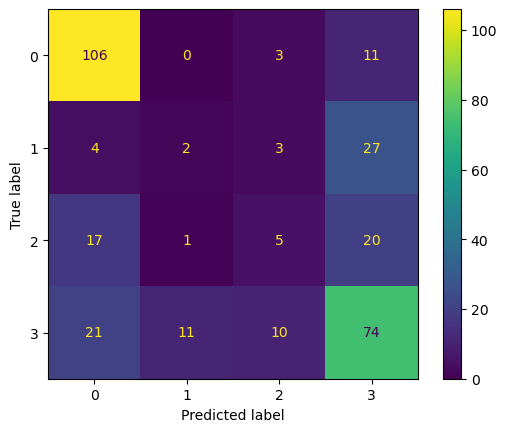

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
save_fig("Reported Work Interference Confusion Matrix")


In [49]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.18101743132049147, 'treatment_Yes'),
 (0.05549415349525993, 'family_history_Yes'),
 (0.04389817687855078, 'remote_work_Yes'),
 (0.04340243490296656, 'coworkers_Some of them'),
 (0.042734025664385646, 'phys_health_interview_No'),
 (0.038653865070793075, 'leave_Somewhat easy'),
 (0.038295088794745816, 'mental_vs_physical_No'),
 (0.03749640451958596, 'tech_company_Yes'),
 (0.03533602607665056, 'care_options_Yes'),
 (0.034042672787957085, 'mental_vs_physical_Yes'),
 (0.03337921308880079, 'seek_help_No'),
 (0.03306357409672783, 'age_range_26-35'),
 (0.03280785744382131, 'Gender_Male'),
 (0.031093971435045678, 'care_options_Not sure'),
 (0.029373396737296623, 'leave_Very easy'),
 (0.028958997033776974, 'wellness_program_No'),
 (0.028353086220564854, 'age_range_36-50'),
 (0.027391854987907346, 'phys_health_interview_Yes'),
 (0.026095335478357552, 'coworkers_Yes'),
 (0.02579689590934607, 'self_employed_Yes'),
 (0.025639247047125505, 'mental_health_interview_No'),
 (0.023741758620194852, 's

Saving figure Feature Importances for Predicting Employee Report of MH Interfering with Work


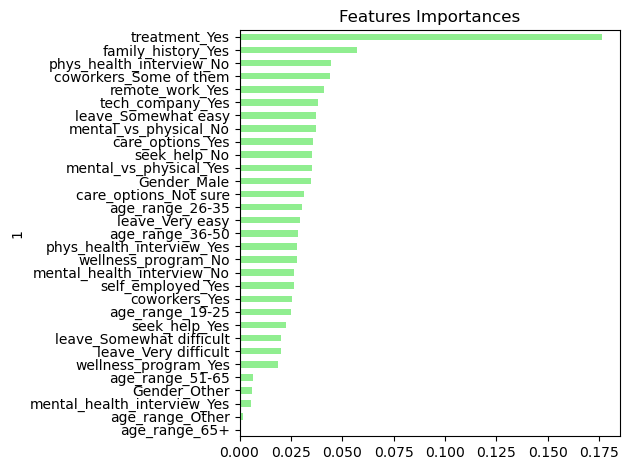

In [ ]:
#Feature Importances Chart based on Random Forest Model
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
save_fig("Feature Importances for Predicting Employee Report of MH Interfering with Work")

In [50]:
#Exporting visualization of Decision Tree Classifier Model
tree.export_graphviz(dt_model, out_file='MH_interference.dot', feature_names=['Gender_Male', 'Gender_Other', 'self_employed_Yes',
       'family_history_Yes', 'treatment_Yes', 'remote_work_Yes',
       'tech_company_Yes', 'care_options_Not sure', 'care_options_Yes',
       'wellness_program_No', 'wellness_program_Yes', 'seek_help_No',
       'seek_help_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy', 'coworkers_Some of them',
       'coworkers_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_interview_No',
       'phys_health_interview_Yes', 'mental_vs_physical_No',
       'mental_vs_physical_Yes', 'age_range_19-25', 'age_range_26-35',
       'age_range_36-50', 'age_range_51-65', 'age_range_65+',
       'age_range_Other'], label=True, filled=True)

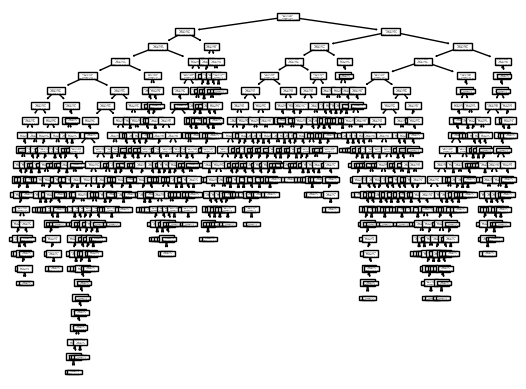

In [51]:
#showing complexity of decision tree given all the features included in the model. 
tree.plot_tree(dt_model)
plt.show()